 import libraries

In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns

import pickle
##from SCRIPT.eval_tools import *

 let's load some data! 🥒

In [2]:
with open('pickle/timeseries_five_bedroom_subset_percent.pkl', 'rb') as fp:
    subset_percent = pickle.load(fp)

In [3]:
with open('pickle/timeseries_five_bedroom_subset.pkl', 'rb') as fp:
    subset = pickle.load(fp)

In [4]:
subset.head(6)

95823     95630     95624     95758     95608     95828     95670  \
02/2007  441909.0  742512.0  545964.0  546908.0  698557.0  459165.0  515483.0   
03/2007  438586.0  739104.0  544316.0  544604.0  696451.0  457205.0  511704.0   
04/2007  436336.0  736379.0  541957.0  542817.0  693845.0  455480.0  508308.0   
05/2007  431486.0  728341.0  535744.0  536926.0  689447.0  450694.0  501724.0   
06/2007  425848.0  719165.0  527519.0  529622.0  682324.0  444315.0  493229.0   
07/2007  420093.0  709546.0  519796.0  520921.0  675371.0  437840.0  485976.0   

            95757     95843     95610  ...     95864     95827     95818  \
02/2007  581338.0  505973.0  475766.0  ...  987652.0  455209.0  476051.0   
03/2007  580736.0  503652.0  473935.0  ...  984506.0  458045.0  474292.0   
04/2007  579198.0  501623.0  471714.0  ...  982037.0  460390.0  472003.0   
05/2007  573643.0  495303.0  465106.0  ...  974067.0  456179.0  467460.0   
06/2007  566405.0  486651.0  457366.0  ...  965315.0  448138.0  460990.0   
07/2007  559663.0  477471.0  449804.0  ...  955419.0  440257.0  455426.0   

            95841     95819     95816     95673     95683     95693     95655  
02/2007  594796.0  337890.0  408802.0  540676.0  793090.0  858367.0  586933.0  
03/2007  590369.0  338002.0  407425.0  536801.0  792198.0  856717.0  585172.0  
04/2007  586612.0  337675.0  407296.0  533808.0  791777.0  852985.0  584468.0  
05/2007  583342.0  335423.0  403534.0  528657.0  784136.0  845674.0  581359.0  
06/2007  577503.0  331437.0  399359.0  522123.0  774251.0  832338.0  576413.0  
07/2007  570044.0  327757.0  394816.0  514345.0  760985.0  819992.0  569223.0  

[6 rows x 37 columns]

In [5]:
subset_percent.head()

95823     95630     95624     95758     95608     95828     95670  \
03/2007 -0.751965 -0.458982 -0.301851 -0.421277 -0.301479 -0.426862 -0.733099   
04/2007 -0.513012 -0.368690 -0.433388 -0.328128 -0.374183 -0.377292 -0.663665   
05/2007 -1.111529 -1.091557 -1.146401 -1.085264 -0.633859 -1.050760 -1.295278   
06/2007 -1.306647 -1.259849 -1.535248 -1.360336 -1.033147 -1.415373 -1.693162   
07/2007 -1.351421 -1.337523 -1.464023 -1.642870 -1.019017 -1.457299 -1.470514   

            95757     95843     95610  ...     95864     95827     95818  \
03/2007 -0.103554 -0.458720 -0.384853  ... -0.318533  0.623011 -0.369498   
04/2007 -0.264836 -0.402858 -0.468630  ... -0.250786  0.511958 -0.482614   
05/2007 -0.959085 -1.259910 -1.400849  ... -0.811578 -0.914659 -0.962494   
06/2007 -1.261760 -1.746810 -1.664137  ... -0.898501 -1.762685 -1.384076   
07/2007 -1.190314 -1.886362 -1.653380  ... -1.025158 -1.758610 -1.206968   

            95841     95819     95816     95673     95683     95693     95655  
03/2007 -0.744289  0.033147 -0.336838 -0.716695 -0.112471 -0.192225 -0.300034  
04/2007 -0.636382 -0.096745 -0.031662 -0.557562 -0.053143 -0.435616 -0.120307  
05/2007 -0.557438 -0.666913 -0.923653 -0.964954 -0.965044 -0.857108 -0.531937  
06/2007 -1.000957 -1.188350 -1.034609 -1.235962 -1.260623 -1.576967 -0.850765  
07/2007 -1.291595 -1.110317 -1.137573 -1.489687 -1.713398 -1.483292 -1.247370  

[5 rows x 37 columns]

  train test split

In [6]:
trdf_percent = subset_percent.iloc[:-40]
trdf_percent.index = pd.to_datetime(trdf_percent.index)

In [7]:
trdf_price = subset.iloc[:-40]
trdf_price.index = pd.to_datetime(trdf_price.index)

 Average Percent Increase of Housing Price

In [8]:
subset_percent.head(3)

95823     95630     95624     95758     95608     95828     95670  \
03/2007 -0.751965 -0.458982 -0.301851 -0.421277 -0.301479 -0.426862 -0.733099   
04/2007 -0.513012 -0.368690 -0.433388 -0.328128 -0.374183 -0.377292 -0.663665   
05/2007 -1.111529 -1.091557 -1.146401 -1.085264 -0.633859 -1.050760 -1.295278   

            95757     95843     95610  ...     95864     95827     95818  \
03/2007 -0.103554 -0.458720 -0.384853  ... -0.318533  0.623011 -0.369498   
04/2007 -0.264836 -0.402858 -0.468630  ... -0.250786  0.511958 -0.482614   
05/2007 -0.959085 -1.259910 -1.400849  ... -0.811578 -0.914659 -0.962494   

            95841     95819     95816     95673     95683     95693     95655  
03/2007 -0.744289  0.033147 -0.336838 -0.716695 -0.112471 -0.192225 -0.300034  
04/2007 -0.636382 -0.096745 -0.031662 -0.557562 -0.053143 -0.435616 -0.120307  
05/2007 -0.557438 -0.666913 -0.923653 -0.964954 -0.965044 -0.857108 -0.531937  

[3 rows x 37 columns]

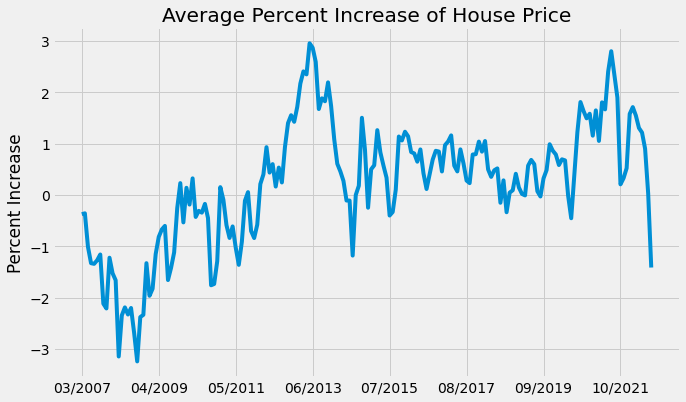

In [9]:
mean = np.mean(subset_percent, axis = 1)
ax = mean.plot(figsize = (10, 6))
plt.ylabel('Percent Increase')
plt.title('Average Percent Increase of House Price')
plt.show()

Average Housing Price

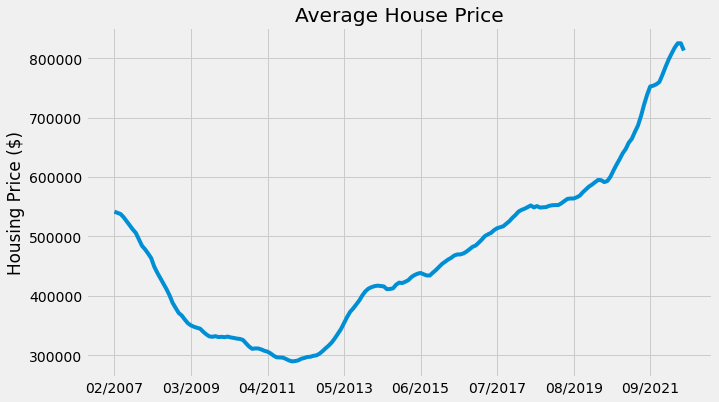

In [10]:
price_mean = np.mean(subset, axis = 1)
ax = price_mean.plot(figsize = (10, 6))
plt.ylabel('Housing Price ($)')
plt.title('Average House Price')
plt.show()

 Percent Increase All Zip Codes

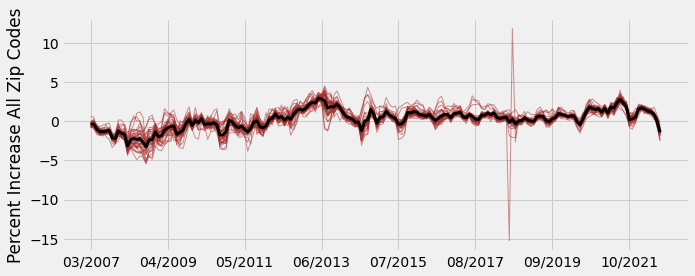

In [11]:
subset_percent.plot(figsize = (10, 4), lw = 1, color = 'brown', alpha = 0.5)
mean.plot(c = 'black', lw = 3)
plt.legend().set_visible(False)
plt.ylabel('Percent Increase All Zip Codes')
plt.show()

 Housing Price ($) All Zip Codes

In [12]:
subset.head(3)

95823     95630     95624     95758     95608     95828     95670  \
02/2007  441909.0  742512.0  545964.0  546908.0  698557.0  459165.0  515483.0   
03/2007  438586.0  739104.0  544316.0  544604.0  696451.0  457205.0  511704.0   
04/2007  436336.0  736379.0  541957.0  542817.0  693845.0  455480.0  508308.0   

            95757     95843     95610  ...     95864     95827     95818  \
02/2007  581338.0  505973.0  475766.0  ...  987652.0  455209.0  476051.0   
03/2007  580736.0  503652.0  473935.0  ...  984506.0  458045.0  474292.0   
04/2007  579198.0  501623.0  471714.0  ...  982037.0  460390.0  472003.0   

            95841     95819     95816     95673     95683     95693     95655  
02/2007  594796.0  337890.0  408802.0  540676.0  793090.0  858367.0  586933.0  
03/2007  590369.0  338002.0  407425.0  536801.0  792198.0  856717.0  585172.0  
04/2007  586612.0  337675.0  407296.0  533808.0  791777.0  852985.0  584468.0  

[3 rows x 37 columns]

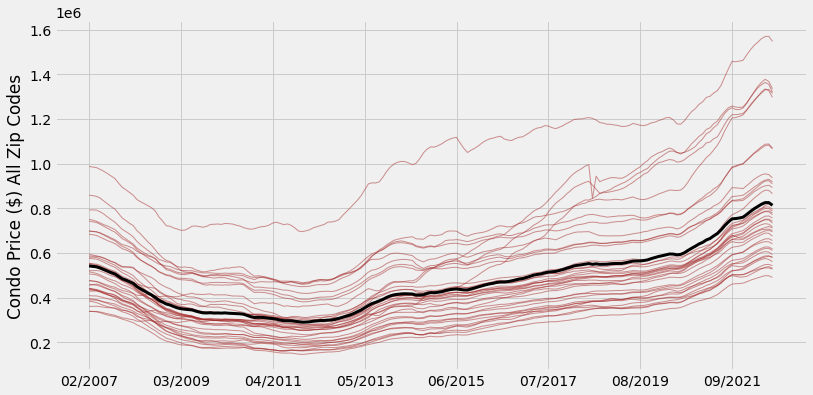

In [13]:
subset.plot(figsize = (12, 6), lw = 1, color = 'brown', alpha = 0.5)
price_mean.plot(c = 'black', lw = 3)
plt.legend().set_visible(False)
plt.ylabel('Condo Price ($) All Zip Codes')
plt.show()

 areas against the trend

 calculate absolute difference

In [14]:
diff_df = trdf_price.apply(lambda x: abs(x-mean))

 top 5 zipcodes with odd trends  

In [15]:
diffs = np.sum(diff_df, axis = 0).sort_values(ascending = False)
select_zipcodes = list(diffs.index[0:5])
print(f'top 5 zipcodes with odd trends: {select_zipcodes}')

top 5 zipcodes with odd trends: [95823, 95820, 95660, 95662, 95824]


 zip closest to average

In [16]:
print(f'closest to the average: {diffs.index[-2]}')

closest to the average: 95826
